## vivado bd
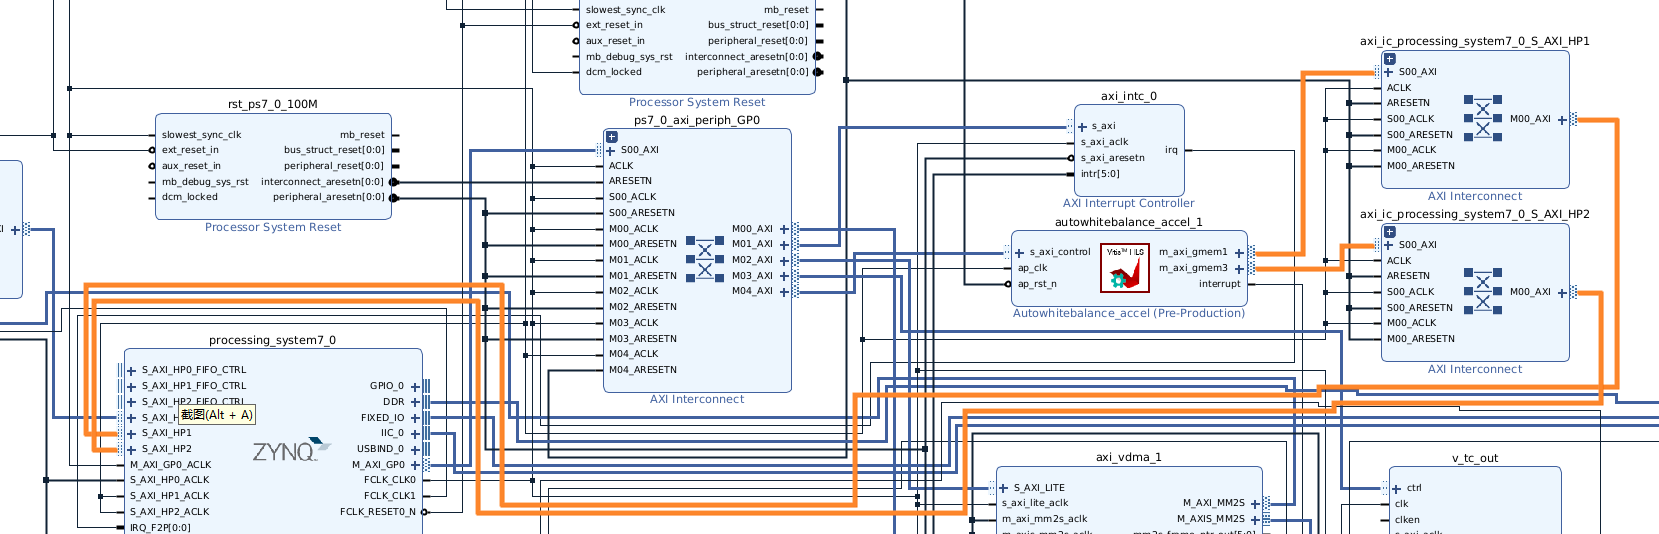
## memory map
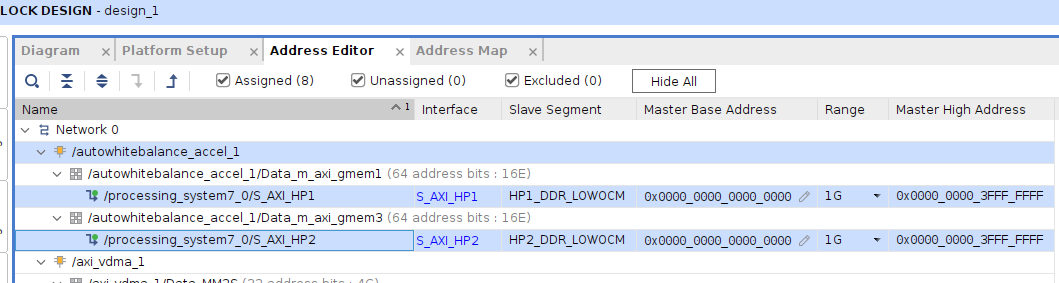


In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('./overlay/krnl_autowhitebalance.xclbin')

In [3]:
#ol.ip_dict

{'autowhitebalance_accel_1': {'phys_addr': 1073741824,
  'addr_range': 96,
  'type': 'xilinx.com:hls:autowhitebalance_accel:1.0',
  'hw_control_protocol': 'ap_ctrl_chain',
  'fullpath': 'autowhitebalance_accel_1',
  'registers': {'CTRL': {'address_offset': 0,
    'access': 'read-write',
    'size': 4,
    'description': 'OpenCL Control Register',
    'type': 'unsigned int',
    'id': None,
    'fields': {'AP_START': {'access': 'read-write',
      'bit_offset': 0,
      'bit_width': 1,
      'description': 'Start the accelerator'},
     'AP_DONE': {'access': 'read-only',
      'bit_offset': 1,
      'bit_width': 1,
      'description': 'Accelerator has finished - cleared on read'},
     'AP_IDLE': {'access': 'read-only',
      'bit_offset': 2,
      'bit_width': 1,
      'description': 'Accelerator is idle'},
     'AP_READY': {'access': 'read-only',
      'bit_offset': 3,
      'bit_width': 1,
      'description': 'Accelerator is ready to start next computation'},
     'AUTO_RESTART': {

In [4]:
awb = ol.autowhitebalance_accel_1

In [5]:
awb.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, AUTO_RESTART=0, AP_CONTINUE=0),
  img_inp = Register(value=0),
  img_out = Register(value=0),
  thresh = Register(value=0),
  rows = Register(value=0),
  cols = Register(value=0),
  inputMin = Register(value=0),
  inputMax = Register(value=0),
  outputMin = Register(value=0),
  outputMax = Register(value=0)
}

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img

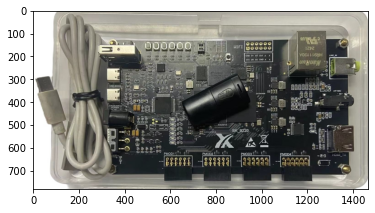

In [7]:
image = img.imread('./images/test.jpg') 
plt.imshow(image)

In [32]:
image[128]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [178, 175, 166],
       [187, 187, 177],
       [227, 227, 217]], dtype=uint8)

In [8]:
import cv2

In [9]:
cv_in_image = cv2.imread('./images/test.jpg',cv2.IMREAD_COLOR)

In [10]:
print(cv_in_image.shape)

(780, 1466, 3)


In [33]:
cv_in_image[128]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [166, 175, 178],
       [177, 187, 187],
       [217, 227, 227]], dtype=uint8)

In [12]:
from pynq import allocate
import numpy as np

In [13]:
#cv_out_image = np.zeros((cv_in_image.shape[0],cv_in_image.shape[1], cv_in_image.shape[2]), dtype=np.uint8)
cv_out_image = allocate(shape=(cv_in_image.shape[0],cv_in_image.shape[1], cv_in_image.shape[2]), dtype=np.uint8)
kernl_in_image = allocate(shape=(cv_in_image.shape[0],cv_in_image.shape[1], cv_in_image.shape[2]), dtype=np.uint8)

In [15]:
thresh = 0.9

inputMin = 0.0
inputMax = 255.0

outputMin = 0.0
outputMax = 255.0

In [27]:
kernl_in_image[:] = cv_in_image

In [34]:
kernl_in_image[128]

PynqBuffer([[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [166, 175, 178],
            [177, 187, 187],
            [217, 227, 227]], dtype=uint8)

In [17]:
awb.register_map.img_inp = kernl_in_image.physical_address

In [18]:
awb.register_map.img_out = cv_out_image.physical_address

In [19]:
awb.register_map.thresh = thresh
awb.register_map.rows = cv_in_image.shape[0]
awb.register_map.cols = cv_in_image.shape[1]
awb.register_map.inputMin = inputMin
awb.register_map.inputMax = inputMax
awb.register_map.outputMin = outputMin
awb.register_map.outputMax = outputMax

In [20]:
awb.register_map.CTRL.AP_DONE

0

In [21]:
awb.register_map.CTRL.AP_START=1

In [22]:
awb.register_map.CTRL.AP_DONE

1

In [35]:
cv_out_image[128]

PynqBuffer([[0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            ...,
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0]], dtype=uint8)